In [53]:
%reload_ext autoreload
%autoreload 2

from asi import path_config

session2 = path_config.measurements / "session2"

In [3]:
import matplotlib.pyplot as plt

from asi.draw import reconstruct_rgb, reconstruct_rgb_envi
from asi.preprocess import load_white_corrected

specim_iq = session2 / "SpecimIQ" / "415" / "capture"

image_path = specim_iq / "415"
darkref_path = specim_iq / "DARKREF_415"
whiteref_path = specim_iq / "WHITEREF_415"

spectral_image, envi_header = load_white_corrected(image_path, whiteref_path, darkref_path)

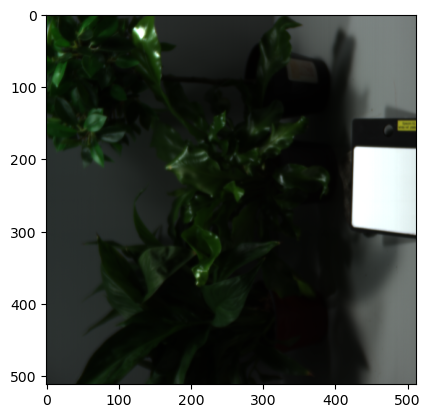

In [4]:
rgb_view = reconstruct_rgb_envi(spectral_image, envi_header)
rgb_view *= 1.5
rgb_view.clip(0, 1, out=rgb_view)
plt.imshow(rgb_view)

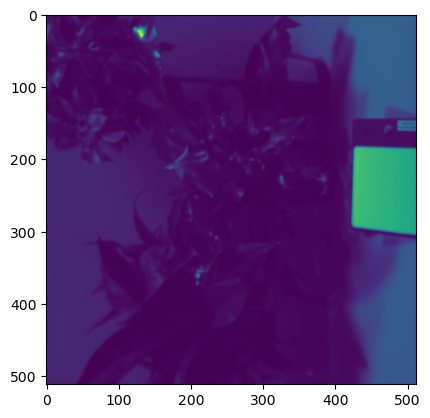

In [5]:
plt.imshow(spectral_image[..., 87])


# Nuance camera

In [12]:
import numpy as np

from asi.io import load_nuance_image

nuance = session2 / "Nuance"

greenmaterials_root = nuance / "greenmaterials"


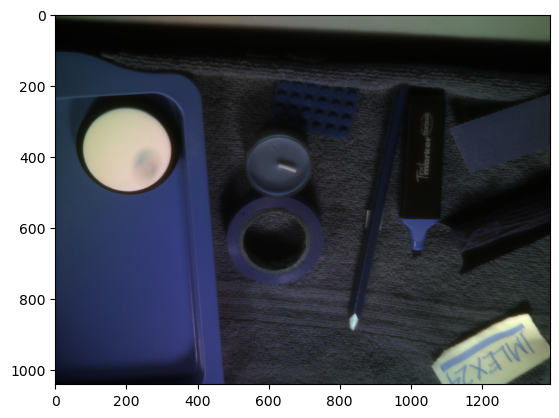

In [43]:
from asi.preprocess import white_correction_sq

spectral_image, wavelengths = load_nuance_image(greenmaterials_root)
spectral_image = spectral_image.astype(np.float64)

# White correction with selected area
white_pos = (slice(370, 430), slice(100, 200))
white_sq = spectral_image[white_pos]
whiteref = white_sq.mean((0, 1))
white_corrected = spectral_image / whiteref

rgb = reconstruct_rgb(white_corrected, wavelengths)
# rgb = np.stack([rgb[..., 1], rgb[..., 2], rgb[..., 0]], axis=-1)

plt.imshow(rgb)

## Save nuance image as ENVI format

In [96]:
lines, samples, bands = spectral_image.shape
print(spectral_image.shape)
spectral_image_uint16 = (spectral_image).astype(np.uint16)
bil_format = spectral_image_uint16.transpose(0, 2, 1).flatten()

bil_format.tofile("saveddata/nuance.raw")
bil_format.shape

(1040, 1392, 51)


(73831680,)

In [97]:
reversed_wavelengths = wavelengths[::-1]
wavelengths_hdr = ",\n\t".join(map(str, reversed_wavelengths))
wavelengths_hdr = f"wavelength = {{\n\t{wavelengths_hdr}\n}}"

header_content = f"""ENVI
ENVI description = {{File Imported into ENVI}}
file type = ENVI
lines = {lines}
samples = {samples}
bands = {bands}
interleave = bil
data type = 12
header offset = 0
byte order = 0
{wavelengths_hdr}
"""
with open("saveddata/nuance.hdr", "w") as f:
    f.write(header_content)

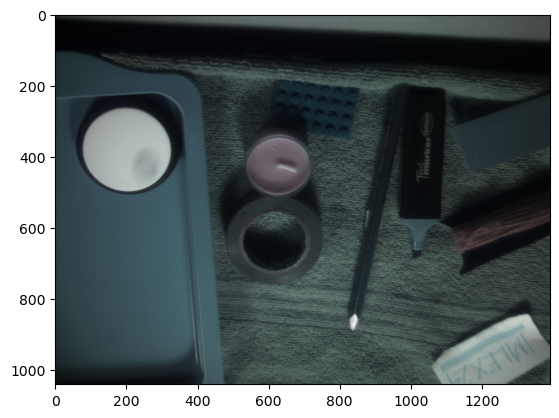

In [98]:
from pathlib import Path

from asi.io.load_envi import load_spectral_image

sp, hdr = load_spectral_image(Path("saveddata/nuance"))


rgb_view = reconstruct_rgb_envi(sp, hdr)
plt.imshow(rgb_view)

# HW3 task1
## 1

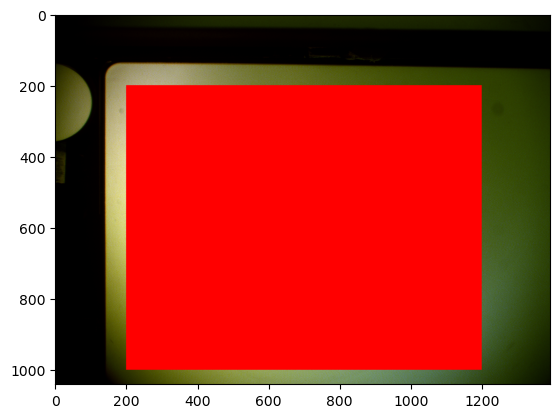

In [47]:
from asi.draw import select_area


session1 = path_config.measurements / "session1"
nuance = session1 / "Nuance"
root = nuance / "white 2lights"

white_image, wavelengths = load_nuance_image(root)
white_image = white_image.astype(np.float64)

# White correction with selected area
white_pos = (slice(200, 1000), slice(200, 1200))

rgb = reconstruct_rgb(white_image, wavelengths)
rgb = select_area(rgb, white_pos)

plt.imshow(rgb)

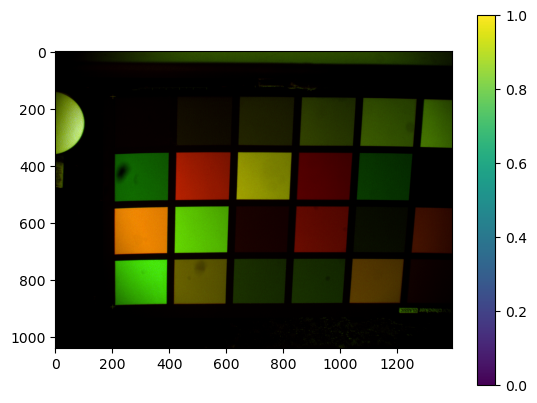

In [52]:
root = nuance / "colorchecker 2lights"

spectral_image, wavelengths = load_nuance_image(root)
spectral_image = spectral_image.astype(np.float64)
white_image = white_image.astype(np.float64)
white_corrected = spectral_image / white_image.mean(axis=(0, 1))
rgb = reconstruct_rgb(white_corrected, wavelengths)
plt.imshow(rgb)
plt.colorbar()

In [ ]:
white_sq = spectral_image[white_pos]
nonzero_elements = white_sq[white_sq!= 0]
min_elm = nonzero_elements.min()
white_sq = white_sq.clip(min_elm, None)



np.float64(1.0)

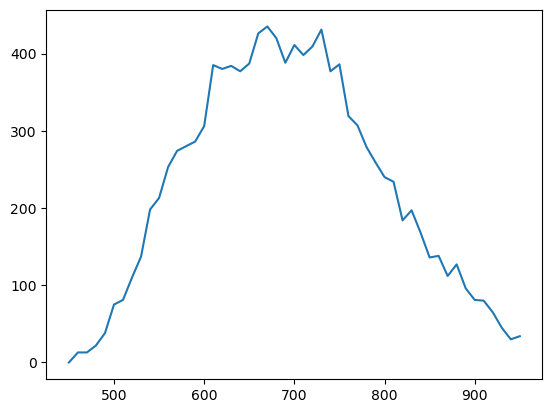

In [27]:
plt.plot(wavelengths, spectral_image[200, 0])

# Tunable

In [1]:
from asi.io import load_tunable_image

tunable_root = session2 / "Tunable"

greenmaterials_root = tunable_root / "green materials"


NameError: name 'session2' is not defined

In [100]:
white_pos = slice(600, 700), slice(250, 310)
spectral_image, channels = load_tunable_image(greenmaterials_root, white_pos)

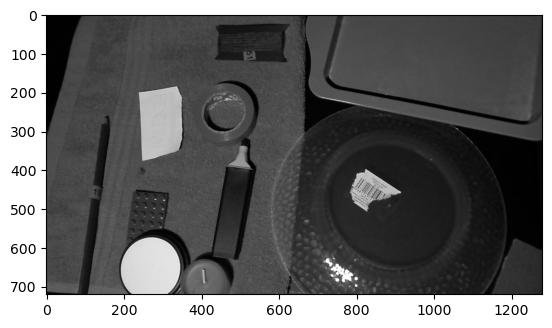

In [14]:
plt.imshow(spectral_image[..., [2, 3, 9]])

## Save tunable image as ENVI format

In [101]:
lines, samples, bands = spectral_image.shape
print(spectral_image.shape)
spectral_image_uint16 = (spectral_image).astype(np.uint16)
bil_format = spectral_image_uint16.transpose(0, 2, 1).flatten()

bil_format.tofile("saveddata/tunable.raw")
bil_format.shape

(720, 1280, 10)


(9216000,)

In [102]:

header_content = f"""ENVI
ENVI description = {{File Imported into ENVI}}
file type = ENVI
lines = {lines}
samples = {samples}
bands = {bands}
interleave = bil
data type = 12
header offset = 0
byte order = 0
"""
with open("saveddata/tunable.hdr", "w") as f:
    f.write(header_content)

## White correction

In [15]:
spectral_image = white_correction_sq(spectral_image, white_pos)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


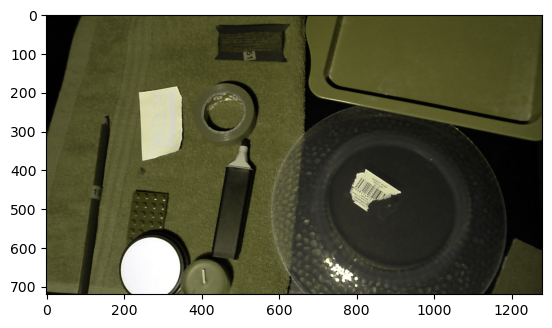

In [31]:
plt.imshow(spectral_image[..., [5, 9, 1]])

In [2]:
# %reload_ext autoreload
# %autoreload 2

import matplotlib.pyplot as plt
import numpy as np

from asi import path_config
from asi.draw import select_area
from asi.io import load_tunable_image

# LOAD IMAGE
session1 = path_config.measurements / "session1"
tunable_root = session1 / "Tunable light sorces" / "ImagesASI"

white_pos = (slice(510, 550), slice(230, 260))
im, channels = load_tunable_image(tunable_root, name="colorchecker")

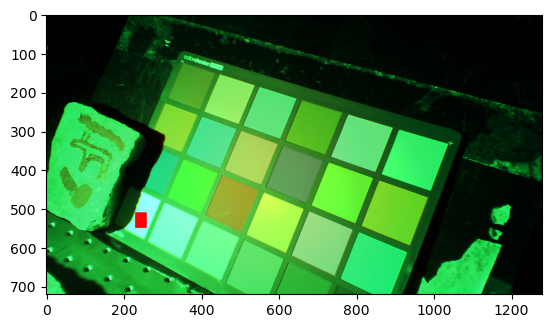

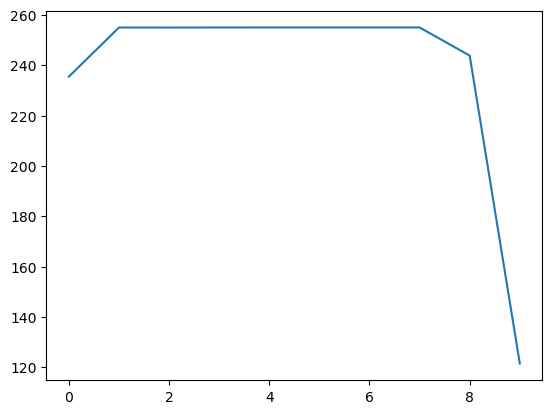

In [9]:
spectral_image = im.astype(np.float64)

white_sq = spectral_image[white_pos]
whiteref = white_sq.mean(axis=(0, 1))
white_corrected = spectral_image / whiteref

rgb_view = spectral_image[..., (9, 4, 0)]
rgb_view /= rgb_view.max()
rgb_view *= 1.2
rgb_view = rgb_view.clip(0, 1)

rgb_view = select_area(rgb_view, white_pos)


plt.imshow(rgb_view)
plt.show()
plt.plot(whiteref)

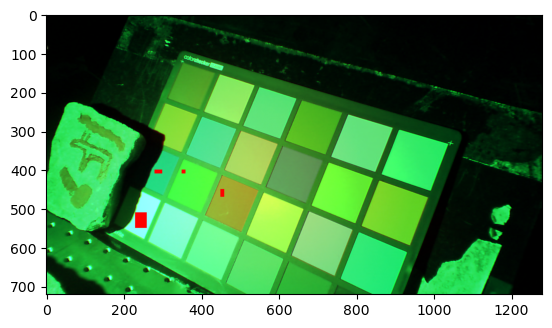

In [12]:
rgb_view = select_area(rgb_view, white_pos)
red_pos = (slice(450, 470), slice(450, 460))
rgb_view = select_area(rgb_view, red_pos)
blue_pos = (slice(400, 410), slice(280, 300))
rgb_view = select_area(rgb_view, blue_pos)
green_pos = (slice(400, 410), slice(350, 360))
rgb_view = select_area(rgb_view, green_pos)
plt.imshow(rgb_view)

In [136]:
white_pos = (slice(450, 470), slice(450, 460))
white_sq = spectral_image[white_pos]
whiteref = white_sq.mean(axis=(0, 1))
a, b, c = white_sq.shape
wc = spectral_image / whiteref


white_pos = (slice(450, 470), slice(450, 460))
white_sq = wc[white_pos]
whiteref = white_sq.mean(axis=(0, 1))
whiteref.dtype

dtype('float64')

In [146]:
next(tunable_root.glob('*'))

PosixPath('/Users/hagayuya/Library/CloudStorage/GoogleDrive-haga.yuya2.2016@gmail.com/マイドライブ/ASI course 2024/group3/session1/Tunable light sorces/ImagesASI/colorchecker, ch 6, exp 125 ms.png')